<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-изучение-информации-о-них" data-toc-modified-id="Загрузка-данных-и-изучение-информации-о-них-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и изучение информации о них</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотезы" data-toc-modified-id="Проверка-гипотезы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотезы</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании


**Описание исследования.**

В данном проекте исследуется поведение выборки клентов компании "Мегалайн" - федерального оператора сотовой связи, пользующихся двумя тарифными планми: «Смарт» и «Ультра», за 2018 год.

Примечание  
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.
_____
**Цель исследования.**   

Какой тариф более выгоден для компании "Мегалайн" для корректировки рекламного бюджета.
_____
**Задачи исследования.**

Необходимо:
* посчитать количество и длительность звонков каждого пользователя по месяцам;
* посчитать количество сообщений каждого пользователя по месяцам;
* посчитать интернет-трафик каждого пользователя по месяцам;
* посчитать ежемесячную выручка с каждого пользователя;
* проанализировать сколько минут разговоров, сколько сообщений и сколько интернет-трафика требуется среднему пользователю каждого тарифа;  
* посчитать дисперсии и стандартные отклонения количества минут разговоров, количества сообщений и количества интернет-трафика пользователей каждого тарифа;  
* построить гистограммы количества минут разговоров, количества сообщений и количества интернет-трафика пользователей каждого тарифа;  
* проверить гипотезу, что средняя выручка с пользователей тарифов «Ультра» и «Смарт» различаются;  
* проверить гипотезу, что средняя выручка с пользователей из Москвы отличается от выручки пользователей из других регионов. 
_____
**Исходные данные.**

В нашем распоряжении данные 500 пользователей «Мегалайна» за 2018 год.
    
**Таблица users (информация о пользователях):**  
user_id — уникальный идентификатор пользователя  
first_name — имя пользователя  
last_name — фамилия пользователя  
age — возраст пользователя (годы)  
reg_date — дата подключения тарифа (день, месяц, год)  
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
city — город проживания пользователя  
tariff — название тарифного плана  
**Таблица calls (информация о звонках):**  
id — уникальный номер звонка  
call_date — дата звонка  
duration — длительность звонка в минутах  
user_id — идентификатор пользователя, сделавшего звонок  
**Таблица messages (информация о сообщениях):**  
id — уникальный номер сообщения  
message_date — дата сообщения  
user_id — идентификатор пользователя, отправившего сообщение  
**Таблица internet (информация об интернет-сессиях):**  
id — уникальный номер сессии  
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)  
session_date — дата интернет-сессии  
user_id — идентификатор пользователя  
**Таблица tariffs (информация о тарифах):**  
tariff_name — название тарифа  
rub_monthly_fee — ежемесячная абонентская плата в рублях  
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату  
messages_included — количество сообщений в месяц, включённых в абонентскую плату  
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
rub_per_message — стоимость отправки сообщения сверх тарифного пакета  
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

##  Загрузка данных и изучение информации о них

Импортируем библиотеки, которые нам потребуются для выполнения проекта

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import os
import matplotlib.pyplot as plt

In [2]:
pth1 = 'calls.csv'
pth2 = 'https://code.s3.yandex.net/datasets/calls.csv'
    
if os.path.exists(pth1):
    calls = pd.read_csv(pth1)
elif os.path.exists(pth2):
    calls = pd.read_csv(pth2)
else:
    print('Something is wrong')
    
pth3 = 'internet.csv'
pth4 = 'https://code.s3.yandex.net/datasets/internet.csv'
    
if os.path.exists(pth3):
    internet = pd.read_csv(pth3, index_col=0)
elif os.path.exists(pth4):
    internet = pd.read_csv(pth4, index_col=0)
else:
    print('Something is wrong')
    
pth5 = 'messages.csv'
pth6 = 'https://code.s3.yandex.net/datasets/messages.csv'
    
if os.path.exists(pth5):
    messages = pd.read_csv(pth5)
elif os.path.exists(pth6):
    messages = pd.read_csv(pth6)
else:
    print('Something is wrong')
    
pth7 = 'tariffs.csv'
pth8 = 'https://code.s3.yandex.net/datasets/tariffs.csv'
    
if os.path.exists(pth7):
    tariffs = pd.read_csv(pth7)
elif os.path.exists(pth8):
    tariffs = pd.read_csv(pth8)
else:
    print('Something is wrong')
    
pth9 = 'users.csv'
pth10 = 'https://code.s3.yandex.net/datasets/users.csv'
    
if os.path.exists(pth9):
    users = pd.read_csv(pth9)
elif os.path.exists(pth10):
    users = pd.read_csv(pth10)
else:
    print('Something is wrong')

Посмотрим, что из себя представляют эти данные, информацию по столбцам и статистическую информацию.

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [7]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [11]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Подготовка данных

Приведем данные к нужным типам.

In [13]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [14]:
calls['call_date'] = pd.to_datetime(calls['call_date']) #меняем тип данных для столбца call_date на datetime

In [15]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [16]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [17]:
internet['session_date'] = pd.to_datetime(internet['session_date']) #меняем тип данных для столбца session_date на datetime

In [18]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


In [19]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [20]:
messages['message_date'] = pd.to_datetime(messages['message_date']) 
#меняем тип данных для столбца message_date на datetime

In [21]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [22]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [23]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [24]:
users['churn_date'] = pd.to_datetime(users['churn_date']) #меняем тип данных для столбца churn_date на datetime
users['reg_date'] = pd.to_datetime(users['reg_date']) #меняем тип данных для столбца reg_date на datetime

In [25]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [26]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [27]:
internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


In [28]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Проверим данные на наличие дубликатов

In [29]:
calls.duplicated().sum()

0

In [30]:
messages.duplicated().sum()

0

In [31]:
internet.duplicated().sum()

0

**Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам**

Добавим в таблицу calls столбец с округленными значениями длительности звонков

In [32]:
calls['duration_round'] = np.ceil(calls['duration'])

In [33]:
calls.head()

,id,call_date,duration,user_id,duration_round
0,1000_0,2018-07-25,0.00,1000,0.0
1,1000_1,2018-08-17,0.00,1000,0.0
2,1000_2,2018-06-11,2.85,1000,3.0
3,1000_3,2018-09-21,13.80,1000,14.0
4,1000_4,2018-12-15,5.18,1000,6.0


Добавим в таблицу calls столбец с месяцем звонка

In [34]:
calls['month'] = calls['call_date'].dt.month

In [35]:
calls.head()

,id,call_date,duration,user_id,duration_round,month
0,1000_0,2018-07-25,0.00,1000,0.0,7
1,1000_1,2018-08-17,0.00,1000,0.0,8
2,1000_2,2018-06-11,2.85,1000,3.0,6
3,1000_3,2018-09-21,13.80,1000,14.0,9
4,1000_4,2018-12-15,5.18,1000,6.0,12


Создадим таблицу calls_months с количеством и суммарной длительностью звонков пользователей по месяцам.

In [36]:
calls_months = calls.groupby(by=['user_id', 'month'], as_index=False)['duration_round'].agg(['count', 'sum'])

In [37]:
calls_months.head()

count    sum
user_id month              
1000    5         22  159.0
        6         43  172.0
        7         47  340.0
        8         52  408.0
        9         58  466.0

In [38]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              202607 non-null  object        
 1   call_date       202607 non-null  datetime64[ns]
 2   duration        202607 non-null  float64       
 3   user_id         202607 non-null  int64         
 4   duration_round  202607 non-null  float64       
 5   month           202607 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 9.3+ MB


In [39]:
calls_1 = calls.groupby(['user_id', 'month'], as_index=False)['duration_round'].agg(['count', 'sum'])
calls_1.head()

count    sum
user_id month              
1000    5         22  159.0
        6         43  172.0
        7         47  340.0
        8         52  408.0
        9         58  466.0

**Посчитаем для каждого пользователя количество отправленных сообщений по месяцам**

Добавим в таблицу messages столбец с месяцем сообщения

In [40]:
messages['month'] = messages['message_date'].dt.month

In [41]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Создадим таблицу messages_months с количеством отправленных пользователями сообщений по месяцам.

In [42]:
messages_months = messages.groupby(['user_id', 'month'])['message_date'].agg(['count'])
messages_months.head()

count
user_id month       
1000    5         22
        6         60
        7         75
        8         81
        9         57

**Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам**

Добавим в таблицу internet столбец с месяцем трафика

In [43]:
internet['month'] = internet['session_date'].dt.month

Создадим таблицу internet_months с количеством трафика пользователей округленного до гигабайт по месяцам.

In [44]:
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [45]:
internet_months = internet.groupby(['user_id', 'month'], as_index=False)['mb_used'].agg(['sum'])

In [46]:
internet_months.head()

sum
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91

In [47]:
internet_months['sum'] = np.ceil(internet_months['sum'] / 1024)
internet_months = internet_months.rename(columns={"sum": "gb_used"})

In [48]:
internet_months.head()

gb_used
user_id month         
1000    5          3.0
        6         23.0
        7         14.0
        8         14.0
        9         15.0

**Посчитаем для каждого пользователя помесячную выручку с каждого пользователя.**

In [49]:
calls_months.head()

count    sum
user_id month              
1000    5         22  159.0
        6         43  172.0
        7         47  340.0
        8         52  408.0
        9         58  466.0

In [50]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [51]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [52]:
calls_months.head()

count    sum
user_id month              
1000    5         22  159.0
        6         43  172.0
        7         47  340.0
        8         52  408.0
        9         58  466.0

In [53]:
messages_months.head()

count
user_id month       
1000    5         22
        6         60
        7         75
        8         81
        9         57

In [54]:
internet_months.head()

gb_used
user_id month         
1000    5          3.0
        6         23.0
        7         14.0
        8         14.0
        9         15.0

Объединим таблицы с количеством потраченных минут, сообщений и интернет траффика по месяцам в одну таблицу - full_spend.

In [55]:
full_spend = calls_months.\
    join(messages_months, on=['user_id','month'], lsuffix='_calls', rsuffix='_messages', how='outer')

In [56]:
full_spend.head()

count_calls    sum  count_messages
user_id month                                    
1000    5             22.0  159.0            22.0
        6             43.0  172.0            60.0
        7             47.0  340.0            75.0
        8             52.0  408.0            81.0
        9             58.0  466.0            57.0

In [57]:
full_spend = full_spend.\
    join(internet_months, on=['user_id','month'], how='outer')

In [58]:
full_spend.head()

count_calls    sum  count_messages  gb_used
user_id month                                             
1000    5             22.0  159.0            22.0      3.0
        6             43.0  172.0            60.0     23.0
        7             47.0  340.0            75.0     14.0
        8             52.0  408.0            81.0     14.0
        9             58.0  466.0            57.0     15.0

Добавим в таблицу users данные по тарифу

In [59]:
users = users.rename(columns={'tariff' : 'tariff_name'})

In [60]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int64         
 1   age          500 non-null    int64         
 2   churn_date   38 non-null     datetime64[ns]
 3   city         500 non-null    object        
 4   first_name   500 non-null    object        
 5   last_name    500 non-null    object        
 6   reg_date     500 non-null    datetime64[ns]
 7   tariff_name  500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [61]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [62]:
users = users.merge(tariffs, on='tariff_name')

In [63]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
2,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1
3,1013,36,NaT,Иваново,Борис,Андреенко,2018-11-14,ultra,1000,30720,3000,1950,150,1,1
4,1016,58,NaT,Омск,Марица,Сазонова,2018-11-21,ultra,1000,30720,3000,1950,150,1,1


Объединим таблицы full_spend и users для удобства вычислений потраченных опций сверх пакетов.
Для объединения таблиц full_spend и users избавимся от иерархичных индексов.

In [64]:
full_spend = full_spend.reset_index()

In [65]:
full_spend.head()

,user_id,month,count_calls,sum,count_messages,gb_used
0,1000,5,22.0,159.0,22.0,3.0
1,1000,6,43.0,172.0,60.0,23.0
2,1000,7,47.0,340.0,75.0,14.0
3,1000,8,52.0,408.0,81.0,14.0
4,1000,9,58.0,466.0,57.0,15.0


In [66]:
full_spend = full_spend.merge(users, on='user_id')
full_spend.head()

,user_id,month,count_calls,sum,count_messages,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Для удобства переименуем столбец sum в sum_calls

In [67]:
full_spend = full_spend.rename(columns={'sum' : 'sum_calls'})

In [68]:
full_spend.head()

,user_id,month,count_calls,sum_calls,count_messages,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Добавим столбец extra_calls с количеством звонков сверх пакета

In [69]:
full_spend['extra_calls'] = np.where((full_spend['sum_calls'] - full_spend['minutes_included']) > 0,\
                                    full_spend['sum_calls'] - full_spend['minutes_included'], 0)

In [70]:
full_spend.sort_values('extra_calls', ascending=False).head()

,user_id,month,count_calls,sum_calls,count_messages,gb_used,age,churn_date,city,first_name,...,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_calls
1359,1216,12,198.0,1435.0,64.0,20.0,74,NaT,Волгоград,Рустам,...,2018-11-23,smart,50,15360,500,550,200,3,3,935.0
2856,1451,12,141.0,1144.0,50.0,17.0,58,NaT,Набережные Челны,Виктория,...,2018-08-27,smart,50,15360,500,550,200,3,3,644.0
1622,1261,12,141.0,1074.0,22.0,32.0,46,NaT,Казань,Мадина,...,2018-10-30,smart,50,15360,500,550,200,3,3,574.0
1452,1229,12,128.0,1022.0,6.0,25.0,24,NaT,Москва,Нелли,...,2018-10-29,smart,50,15360,500,550,200,3,3,522.0
3108,1486,12,133.0,1007.0,83.0,38.0,35,NaT,Нижний Новгород,Матвей,...,2018-10-31,smart,50,15360,500,550,200,3,3,507.0


Добавим столбец extra_messages с количеством сообщений сверх пакета

In [71]:
full_spend['extra_messages'] = np.where((full_spend['count_messages'] - full_spend['messages_included']) > 0,\
                                    full_spend['count_messages'] - full_spend['messages_included'], 0)

In [72]:
full_spend.sort_values('extra_messages', ascending=False).head()

,user_id,month,count_calls,sum_calls,count_messages,gb_used,age,churn_date,city,first_name,...,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_calls,extra_messages
695,1112,12,75.0,544.0,143.0,22.0,51,NaT,Ульяновск,Арнольд,...,smart,50,15360,500,550,200,3,3,44.0,93.0
2030,1324,10,117.0,838.0,139.0,27.0,25,NaT,Череповец,Дайна,...,smart,50,15360,500,550,200,3,3,338.0,89.0
2027,1324,7,97.0,719.0,137.0,20.0,25,NaT,Череповец,Дайна,...,smart,50,15360,500,550,200,3,3,219.0,87.0
2029,1324,9,107.0,715.0,136.0,23.0,25,NaT,Череповец,Дайна,...,smart,50,15360,500,550,200,3,3,215.0,86.0
2026,1324,6,114.0,757.0,134.0,26.0,25,NaT,Череповец,Дайна,...,smart,50,15360,500,550,200,3,3,257.0,84.0


Добавим столбец extra_gb с количеством интернет трафика сверх пакета

In [73]:
full_spend['extra_gb'] = np.where((full_spend['gb_used'] - full_spend['mb_per_month_included'] / 1024) > 0,\
                                    full_spend['gb_used'] - full_spend['mb_per_month_included'] / 1024, 0)

In [74]:
full_spend.sort_values('extra_gb', ascending=False).head()

,user_id,month,count_calls,sum_calls,count_messages,gb_used,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_calls,extra_messages,extra_gb
3108,1486,12,133.0,1007.0,83.0,38.0,35,NaT,Нижний Новгород,Матвей,...,50,15360,500,550,200,3,3,507.0,33.0,23.0
260,1042,12,121.0,728.0,75.0,37.0,42,NaT,Хабаровск,Константин,...,50,15360,500,550,200,3,3,228.0,25.0,22.0
3107,1486,11,108.0,764.0,96.0,36.0,35,NaT,Нижний Новгород,Матвей,...,50,15360,500,550,200,3,3,264.0,46.0,21.0
615,1098,12,80.0,588.0,14.0,36.0,39,NaT,Челябинск,Элеонора,...,50,15360,500,550,200,3,3,88.0,0.0,21.0
1000,1159,12,110.0,734.0,2.0,35.0,64,NaT,Красноярск,Эльга,...,50,15360,500,550,200,3,3,234.0,0.0,20.0


Добавим столбец с суммарной выручкой по месяцам по каждому пользователю

In [75]:
full_spend['revenue'] = full_spend['rub_monthly_fee'] + full_spend['rub_per_minute'] * full_spend['extra_calls']\
    + full_spend['rub_per_message'] * full_spend['extra_messages']\
    + full_spend['rub_per_gb'] * full_spend['extra_gb']

In [76]:
full_spend.sort_values('revenue', ascending=False).head()

,user_id,month,count_calls,sum_calls,count_messages,gb_used,age,churn_date,city,first_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_calls,extra_messages,extra_gb,revenue
3108,1486,12,133.0,1007.0,83.0,38.0,35,NaT,Нижний Новгород,Матвей,...,15360,500,550,200,3,3,507.0,33.0,23.0,6770.0
260,1042,12,121.0,728.0,75.0,37.0,42,NaT,Хабаровск,Константин,...,15360,500,550,200,3,3,228.0,25.0,22.0,5709.0
3107,1486,11,108.0,764.0,96.0,36.0,35,NaT,Нижний Новгород,Матвей,...,15360,500,550,200,3,3,264.0,46.0,21.0,5680.0
1622,1261,12,141.0,1074.0,22.0,32.0,46,NaT,Казань,Мадина,...,15360,500,550,200,3,3,574.0,0.0,17.0,5672.0
1793,1286,12,95.0,739.0,68.0,35.0,19,NaT,Москва,Рашид,...,15360,500,550,200,3,3,239.0,18.0,20.0,5321.0


## Анализ данных

**Опишем поведение клиентов оператора, исходя из выборки**

Посмотрим средние и медианные количество минут разговоров, количество сообщений и объемы трафика пользователей по тарифным планам

In [77]:
full_spend.groupby('tariff_name')[['sum_calls', 'count_messages', 'gb_used', 'revenue']].agg(['mean', 'median', 'sum'])

sum_calls                  count_messages                  \
                   mean median       sum           mean median      sum   
tariff_name                                                               
smart        419.062978  423.0  931577.0      38.716441   34.0  74413.0   
ultra        545.451104  528.0  518724.0      61.161006   51.0  48623.0   

               gb_used                      revenue                     
                  mean median      sum         mean  median        sum  
tariff_name                                                             
smart        16.336176   17.0  36397.0  1289.973531  1023.0  2875351.0  
ultra        19.694359   19.0  19202.0  2070.152284  1950.0  2039100.0

In [78]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Из данных видно, что средние и медианные значения близки.  
Будем рассматривать медианные значения, так как они будут учитывать половину пользователей.  
  
Клиенты тарифа smart:  
- разговаривают не более 423 минут за месяц, в тарифе 500 минут - пакет перекрывает их траты;  
- отправляют не более 34 сообщений, в тарифе 50 сообщений - пакет перекрывает их траты;  
- тратят не более 17 ГБ, в тарифе 15 ГБ - большинству приходится докупать интернет-трафик. 
  
Клиенты тарифа ultra:  
- разговаривают не более 528 минут за месяц, в тарифе 3000 минут - пакет перекрывает их траты;  
- отправляют не более 51 сообщений, в тарифе 1000 сообщений - пакет перекрывает их траты;  
- тратят не более 19 ГБ, в тарифе 30 ГБ - пакет перекрывает их траты. 

Посчитаем дисперсии и стандартные отклонения количества минут разговоров, количества сообщений и объемов трафика пользователей по тарифным планам

In [79]:
full_spend.groupby('tariff_name')[['sum_calls', 'count_messages', 'gb_used', 'revenue']].var(ddof=1)

,sum_calls,count_messages,gb_used,revenue
tariff_name,,,,
smart,35844.189551,717.594201,32.923756,669785.708006
ultra,94203.418396,2109.659183,94.146734,141516.745079


In [80]:
full_spend.groupby('tariff_name')[['sum_calls', 'count_messages', 'gb_used']].std(ddof=1)

,sum_calls,count_messages,gb_used
tariff_name,,,
smart,189.325618,26.787949,5.737923
ultra,306.925754,45.931026,9.702924


Построим гистограммы

**Гистограмма количества минут звонков клиентов, пользующихся тарифом smart**

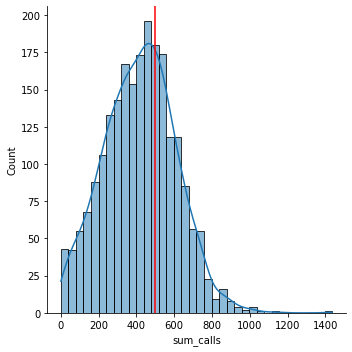

In [81]:
sns_plot = sns.displot(full_spend.loc[full_spend['tariff_name'] == 'smart']['sum_calls'], 
                       kde=True)
plt.axvline(500, color='r')

Количество минут звонков клиентов, пользующихся тарифом smart, имеет усеченное нормальное распределение.

**Гистограмма количества сообщений клиентов, пользующихся тарифом smart**

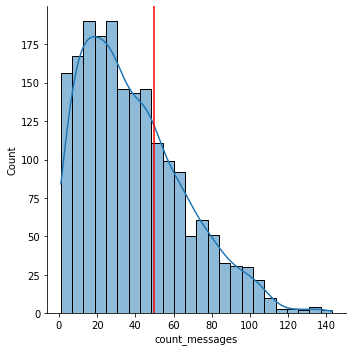

In [82]:
sns_plot = sns.displot(full_spend.loc[full_spend['tariff_name'] == 'smart']['count_messages'], 
                       kde=True)
plt.axvline(50, color='r')

Количество сообщений клиентов, пользующихся тарифом smart, имеет усеченное нормальное распределение. Многие (чуть меньше половины) клиенты, пользующиеся тарифом smart, не укладываются в лимит по количеству сообщений

**Гистограмма количества интернет-трафика клиентов, пользующихся тарифом smart**

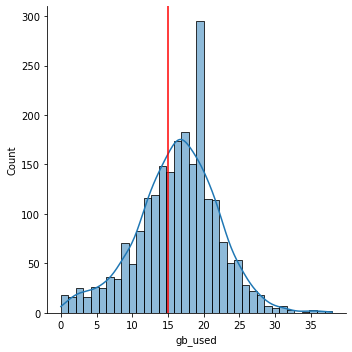

In [83]:
sns_plot = sns.displot(full_spend.loc[full_spend['tariff_name'] == 'smart']['gb_used'], kde=True)
plt.axvline(15, color='r')

Количество интернет-трафика клиентов, пользующихся тарифом smart, имеет нормальное распределение. Большинство клиентов (около 60%), пользующиеся тарифом smart, не укладываются в лимит по интернет-трафику

**Гистограмма количества минут звонков клиентов, пользующихся тарифом ultra**

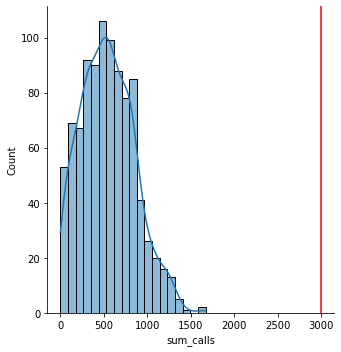

In [84]:
sns_plot = sns.displot(full_spend.loc[full_spend['tariff_name'] == 'ultra']['sum_calls'], kde=True)
plt.axvline(3000, color='r')

Количество минут звонков клиентов, пользующихся тарифом ultra, имеет усеченное нормальное распределение. Все клиенты, пользующиеся тарифом ultra, укладываются в лимит по звонкам

**Гистограмма количества сообщений клиентов, пользующихся тарифом ultra**

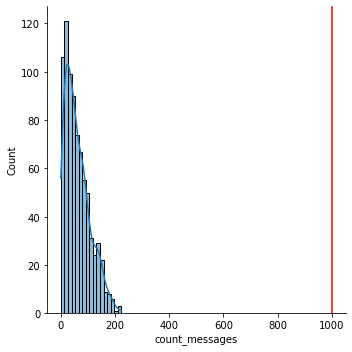

In [85]:
sns_plot = sns.displot(full_spend.loc[full_spend['tariff_name'] == 'ultra']['count_messages'], kde=True)
plt.axvline(1000, color='r')

Количество сообщений клиентов, пользующихся тарифом ultra, имеет усеченное нормальное распределение. Все клиенты, пользующиеся тарифом ultra, укладываются в лимит по количеству сообщений

**Гистограмма количества интернет-трафика клиентов, пользующихся тарифом ultra**

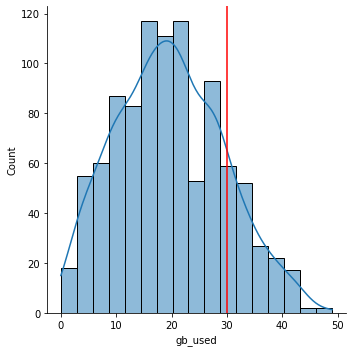

In [86]:
sns_plot = sns.displot(full_spend.loc[full_spend['tariff_name'] == 'ultra']['gb_used'], kde=True)
plt.axvline(30, color='r')

Количество интернет-трафика клиентов, пользующихся тарифом ultra, имеет усеченное нормальное распределение. Большинство клиентов (около 80%), пользующиеся тарифом ultra, укладываются в лимит по интернет-трафику

## Проверка гипотезы


**Проверим гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**
  
В качестве нулевой гипотезы H0 примем, что средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются,  
в качестве альтернативной гипотезы H1 примем, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.  
  
Для проверки будем использовать t-тест потому, что генеральные совокупности не зависят друг от друга, выборочные средние нормально распределены, однако учтём, что дисперсии выборок различны. Примем пороговый уровень значимости alpha = 5%.

In [87]:
scipy.stats.ttest_ind(full_spend.loc[full_spend['tariff_name'] == 'smart']['revenue'],\
                      full_spend.loc[full_spend['tariff_name'] == 'ultra']['revenue'], equal_var=False)

Ttest_indResult(statistic=-37.019021231454644, pvalue=4.2606313931076085e-250)

В результате t-теста получили p-уровень значимости значительно меньше alpha, в следствии чего можем отвергнуть нулевую гипотезу.  
Значит средняя выручка с пользователей различных тарифных планов различаются.

**Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**  
  
В качестве нулевой гипотезы H0 примем, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов,  
в качестве альтернативной гипотезы H1 примем, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.  
  
Для проверки будем использовать t-тест потому, что генеральные совокупности не зависят друг от друга, выборочные средние нормально распределены. Примем пороговый уровень значимости alpha = 5%.

Проверим дисперсии выборок

In [88]:
full_spend.loc[full_spend['city'] == 'Москва']['revenue'].var(ddof=1)

565636.4670118855

In [89]:
full_spend.loc[full_spend['city'] != 'Москва']['revenue'].var(ddof=1)

654137.6285218048

Дисперсии выборок различны (различие около 20%)

In [90]:
scipy.stats.ttest_ind(full_spend.loc[full_spend['city'] == 'Москва']['revenue'],\
                      full_spend.loc[full_spend['city'] != 'Москва']['revenue'], equal_var=False)

Ttest_indResult(statistic=0.6347555055229303, pvalue=0.5257376663729298)

В результате t-теста получили p-уровень значимости больше alpha, в следствии чего не удалось отвергнуть нулевую гипотезу, статистически значимых различий нет.  
Значит будем считать, что средняя выручка с пользователей из Москвы и других городов не различаются.

##  Вывод


Задачей данного проекта было определить какой тариф выгоднее для корректировки рекламного бюджета.  
  
В ходе проекта были выполнены:  
* загрузка данных предоставленных оператором;
* предобработка данных - данные без пропусков и дубликатов, были поменяны типы данных для столбцов с датами;  
* посчитано количество и длительность звонков каждого пользователя по месяцам;
* посчитано количество сообщений каждого пользователя по месяцам;
* посчитан интернет-трафик каждого пользователя по месяцам;
* посчитана ежемесячная выручка с каждого пользователя;
* проанализировано сколько минут разговоров, сколько сообщений и сколько интернет-трафика требуется среднему пользователю каждого тарифа;  
* посчитаны дисперсии и стандартные отклонения количества минут разговоров, количества сообщений и количества интернет-трафика пользователей каждого тарифа;  
* построены гистограммы количества минут разговоров, количества сообщений и количества интернет-трафика пользователей каждого тарифа;  
* проверена гипотеза, что средняя выручка с пользователей тарифов «Ультра» и «Смарт» различаются;  
* проверена гипотеза, что средняя выручка с пользователей из Москвы отличается от выручки пользователей из других регионов. 
  
****  
Из анализа видно, что средняя выручка с пользователей различных тарифом отличается.  
Пользователи тарифа ultra в среднем приносят больше выручки, но стоит учитывать, что количество пользователей тарифа smart сильно больше и суммарное количество выручки они приносят больше. Стоит это учесть при распределении рекламного бюджета (может оказаться, что количество пользователей тарифа ultra ограниченно, ввиду его дороговизны, и стоимость привлечения одного клиента выйдет дороже чем привлечение нескольких клиентов тарифа smart).  
Большинству пользователей тарифа smart приходится докупать интернет-трафик, большинство пользователей тарифа ultra ничего не докупает, так как им хватает, входящие в тариф пакеты.  
Средняя выручка с пользователей из Москвы отличается от выручки пользователей из других регионов не отличается. Это логично, так как тарифы у нас федеральные и не отличаются по городам, поведение клентов не отличается в зависимости от города.